In [56]:
%reload_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm 

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

import Helper.Preprocessing as pp 
import Helper.Model as ml 

In [57]:
df = pd.read_csv("Data/dataset.csv", sep=",")
df.Date = pd.to_datetime(df.Date)
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,SARON_close,US_IR,CH_infl,US_infl
0,2005-01-03,1.1378,1.1550,1.1374,1.1470,1.1470,0.0,"0,588191","1,99","-0,5","0,21019443"
1,2005-01-04,1.1471,1.1706,1.1443,1.1676,1.1676,0.0,"0,616042","2,05","-0,5","0,21019443"
2,2005-01-05,1.1676,1.1754,1.1655,1.1669,1.1669,0.0,"0,696835","2,04","-0,5","0,21019443"


In [58]:
Close =  df.Close
US_infl = df.US_infl.apply(lambda x: x.replace(',', '.')).astype(float)
CH_infl = df.CH_infl.apply(lambda x: x.replace(',', '.')).astype(float)
US_IR = df.US_IR.apply(lambda x: x.replace(',', '.')).astype(float)
SARON_close = df.SARON_close.apply(lambda x: x.replace(',', '.')).astype(float)
data = [Close, US_infl, CH_infl,US_IR, SARON_close]

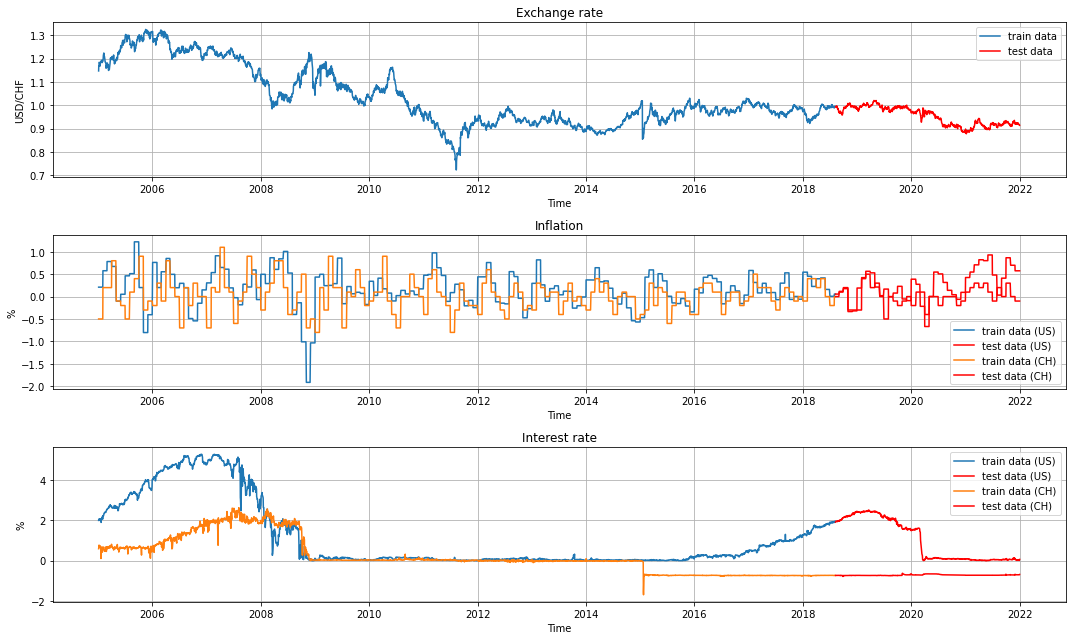

In [59]:
FRACTION_TEST = 0.2
nb_test = int(FRACTION_TEST*len(df))

plt.figure(figsize=(15, 9))

plt.subplot(3,1,1)
plt.title("Exchange rate")
plt.plot(df.Date.values[:-nb_test],df.Close.values[:-nb_test], label="train data")
plt.plot(df.Date.values[-nb_test:], df.Close.values[-nb_test:], color="r", label="test data")
plt.xlabel("Time", fontsize=10)
plt.ylabel("USD/CHF", fontsize=10)
plt.grid()
plt.legend(fontsize=10)

plt.subplot(3,1,2)
plt.title("Inflation")
plt.plot(df.Date.values[:-nb_test],US_infl.values[:-nb_test], label="train data (US)")
plt.plot(df.Date.values[-nb_test:], US_infl.values[-nb_test:], color="r", label="test data (US)")
plt.plot(df.Date.values[:-nb_test],CH_infl.values[:-nb_test], label="train data (CH)")
plt.plot(df.Date.values[-nb_test:], CH_infl.values[-nb_test:], color="r", label="test data (CH)")
plt.xlabel("Time", fontsize=10)
plt.ylabel("%", fontsize=10)
plt.grid()
plt.legend(fontsize=10)

plt.subplot(3,1,3)
plt.title("Interest rate")
plt.plot(df.Date.values[:-nb_test],US_IR.values[:-nb_test], label="train data (US)")
plt.plot(df.Date.values[-nb_test:], US_IR.values[-nb_test:], color="r", label="test data (US)")
plt.plot(df.Date.values[:-nb_test],SARON_close.values[:-nb_test], label="train data (CH)")
plt.plot(df.Date.values[-nb_test:], SARON_close.values[-nb_test:], color="r", label="test data (CH)")
plt.xlabel("Time", fontsize=10)
plt.ylabel("%", fontsize=10)
plt.grid()
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

In [67]:
train_x, val_x, test_x, train_y, val_y, test_y, norm = pp.generate_dataset(data, lookback_=10, norm_=False, fraction_val_=0.2, fraction_test_=FRACTION_TEST)

Shape:         
X train     (2830, 10, 5), y train     (2830, 5)        
X train val (708, 10, 5) , y train val (708, 5)         
X test      (887, 10, 5) , y test      (887, 5)
